In [6]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('wholesale_customers_data.csv')
data.shape
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [27]:
# not knowing any better, I was doing things the hard way

# fresh_min_value = data['Fresh'].mean() - (3 * data['Fresh'].std())
# milk_min_value = data['Milk'].mean() - (3 * data['Milk'].std())
# grocery_min_value = data['Grocery'].mean() - (3 * data['Grocery'].std())
# frozen_min_value = data['Frozen'].mean() - (3 * data['Frozen'].std())
# detergents_Paper_min_value = data['Detergents_Paper'].mean() - (3 * data['Detergents_Paper'].std())
# delicassen_min_value = data['Delicassen'].mean() - (3 * data['Delicassen'].std())

# fresh_max_value = data['Fresh'].mean() + (3 * data['Fresh'].std())
# milk_max_value = data['Milk'].mean() + (3 * data['Milk'].std())
# grocery_max_value = data['Grocery'].mean() + (3 * data['Grocery'].std())
# frozen_max_value = data['Frozen'].mean() + (3 * data['Frozen'].std())
# detergents_Paper_max_value = data['Detergents_Paper'].mean() + (3 * data['Detergents_Paper'].std())
# delicassen_max_value = data['Delicassen'].mean() + (3 * data['Delicassen'].std())

In [12]:
# text's solution
data.shape

(440, 8)

In [16]:
outliers = {}
for i in range(data.shape[1]):
    min_t = data[data.columns[i]].mean() - (3 * data[data.columns[i]].std())
    max_t = data[data.columns[i]].mean() + (3 * data[data.columns[i]].std())
    # print(f'min_t = {min_t}, max_t = {max_t}')
    count = 0
    for j in data[data.columns[i]]:
        if j < min_t or j > max_t:
            count += 1

    outliers[data.columns[i]] = [count, data.shape[0]-count]

print(outliers)

{'Channel': [0, 440], 'Region': [0, 440], 'Fresh': [7, 433], 'Milk': [9, 431], 'Grocery': [7, 433], 'Frozen': [6, 434], 'Detergents_Paper': [10, 430], 'Delicassen': [4, 436]}


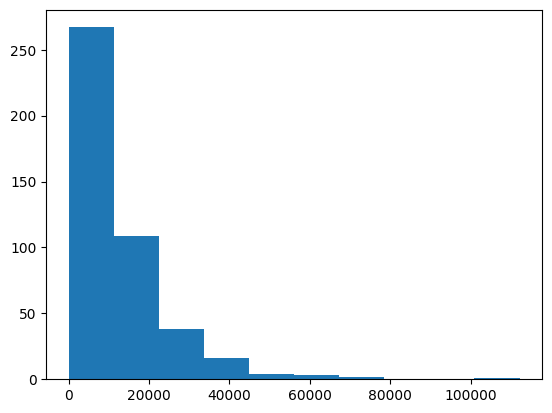

In [17]:
plt.hist(data['Fresh'])
plt.show()

In [20]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [21]:
data_standardization = (data - data.mean())/data.std()
data_standardization.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.447005,0.589997,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,1.447005,0.589997,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,1.447005,0.589997,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,-0.689512,0.589997,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,1.447005,0.589997,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870
